<a href="https://colab.research.google.com/github/waghrameshwar123/Medical_Cost_Prediction/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Basic Libraries that will be required throughout the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the csv file in df variable and printing out first 10 rows using head method
df=pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#bmi body mass index
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#One Hot Encoding
tem=pd.get_dummies(df["region"])

tem.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [ ]:
df.drop("region",axis=1,inplace=True)

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
5,31,female,25.740,0,no,3756.62160
6,46,female,33.440,1,no,8240.58960
7,37,female,27.740,3,no,7281.50560
8,37,male,29.830,2,no,6406.41070
9,60,female,25.840,0,no,28923.13692


In [ ]:
#Combining Both Data Frames
df=pd.concat([df,tem],axis=1)
df.head(10)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
5,31,female,25.740,0,no,3756.62160,0,0,1,0
6,46,female,33.440,1,no,8240.58960,0,0,1,0
7,37,female,27.740,3,no,7281.50560,0,1,0,0
8,37,male,29.830,2,no,6406.41070,1,0,0,0
9,60,female,25.840,0,no,28923.13692,0,1,0,0


In [ ]:
#Converting categorical variables to numeric using map
map={"yes":1,"no":0}
df["smoker"]=df["smoker"].map(map)
map1={"female":0,"male":1}
df["sex"]=df["sex"].map(map1)
df.head(10)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


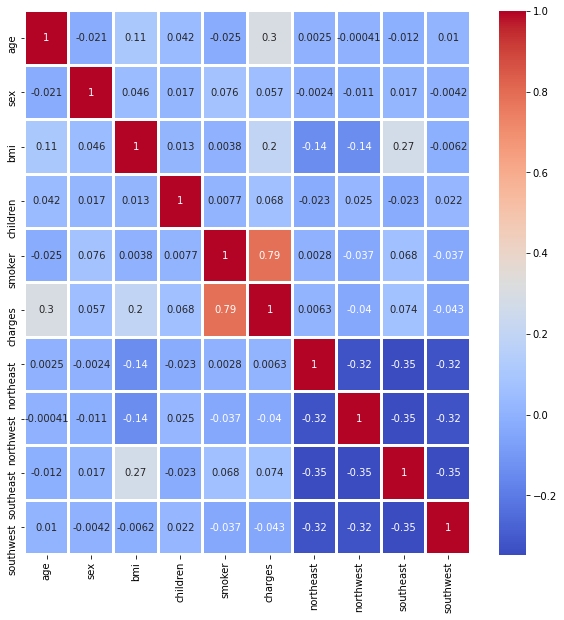

In [ ]:
#Correlation Heatmap to find out highly correlated columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=2)

Text(0, 0.5, 'Charges')

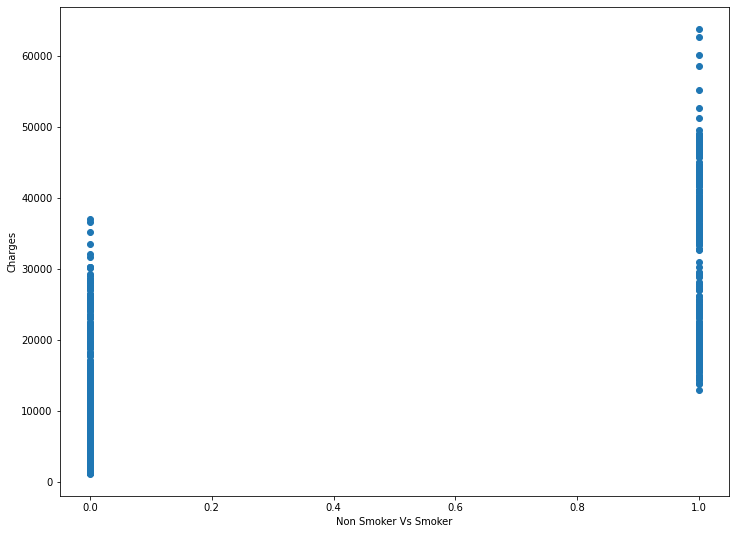

In [ ]:
#Scatter plot of target based on Smoker.
x=df["smoker"]
y=df["charges"]
plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.xlabel("Non Smoker Vs Smoker")
plt.ylabel("Charges")

**It is clearly visible that smokers have high medical costs (13000-60000+) when compared to non smoker(0-38000)**

In [ ]:
Y=df["charges"]
X=df.drop("charges",axis=1)

In [ ]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the data into 85% for training and 15% for testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.15)

In [ ]:
from sklearn.linear_model import LinearRegression
#Training a multiple linear regression model
reg=LinearRegression().fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
#Checking the R squared error on test data
r2_score(y_test,y_pred)

0.7444438290908182

In [ ]:
# Storing independent features in a temporary variable
P_X=X

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Changing the data to a 3rd degree polynomial
pol=PolynomialFeatures(degree=3)
P_X=pol.fit_transform(X)
P_X

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [ ]:
#Training the model similarly but with 3rd degree polynomial of X this time
x_train,x_test,y_train,y_test=train_test_split(P_X,Y,random_state=1,test_size=0.15)
reg=LinearRegression().fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.8421061240331428

In [ ]:
#Cross validating the score to check and avoid overfitting
from sklearn.model_selection import cross_val_score
c=cross_val_score(reg,P_X,Y,cv=4)
c

array([0.84846302, 0.79022141, 0.85205271, 0.81596221])

In [ ]:
# Final Mean Accuracy
print("Mean accuracy after cross validation is:",c.mean()*100,end="%")

Mean accuracy after cross validation is: 82.66748374845253%

***Conclusion: We have succesfully identified the pattern in the data and the 3rd degree polynomial regression has given a good accuracy of 82% on cross validation.***